In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("mlg-ulb/creditcardfraud")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'creditcardfraud' dataset.
Path to dataset files: /kaggle/input/creditcardfraud


In [3]:
from kagglehub import KaggleDatasetAdapter

fraud_detect = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "mlg-ulb/creditcardfraud",
    "creditcard.csv"
)

/tmp/ipython-input-3620249821.py:3: DeprecationWarning: Use dataset_load() instead of load_dataset(). load_dataset() will be removed in a future version.
  fraud_detect = kagglehub.load_dataset(


Using Colab cache for faster access to the 'creditcardfraud' dataset.


In [4]:
pd.set_option('display.max_columns', None)
fraud_detect.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
fraud_detect.shape

(284807, 31)

In [6]:
fraud_detect.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

##V1 to V28 are feature made by using PCA and are used to detect whether the transaction is fraud or not

##0 is not fraud, 1 is fraud

In [7]:
X = fraud_detect.drop(columns=['Class','Amount','Time'],axis = 1)
Y = fraud_detect['Class']

In [8]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=42)

In [9]:
smote = SMOTE(random_state=42)

X_train_smote, Y_train_smote = smote.fit_resample(X_train, Y_train)

In [10]:
LR = LogisticRegression()
LR.fit(X_train_smote,Y_train_smote)

LogisticRegression()

In [11]:
Y_pred = LR.predict(X_test)

In [12]:
Y_test

,Class
263020,0
11378,0
147283,0
219439,0
36939,0
...,...
54199,0
184616,0
274532,0
269819,0


In [13]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [14]:
accuracy_lr = accuracy_score(Y_test,Y_pred)
precision_lr = precision_score(Y_test,Y_pred)
recall_lr = recall_score(Y_test,Y_pred)
f1_lr = f1_score(Y_test,Y_pred)

print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1:{f1_lr}")

Accuracy: 0.9729995435553527
Precision: 0.05555555555555555
Recall: 0.9183673469387755
F1:0.10477299185098952


In [15]:
rf = RandomForestClassifier(n_estimators=100,random_state=42,n_jobs=-1)
rf.fit(X_train_smote,Y_train_smote)

RandomForestClassifier(n_jobs=-1, random_state=42)

In [16]:
single_tree = rf.estimators_[0]

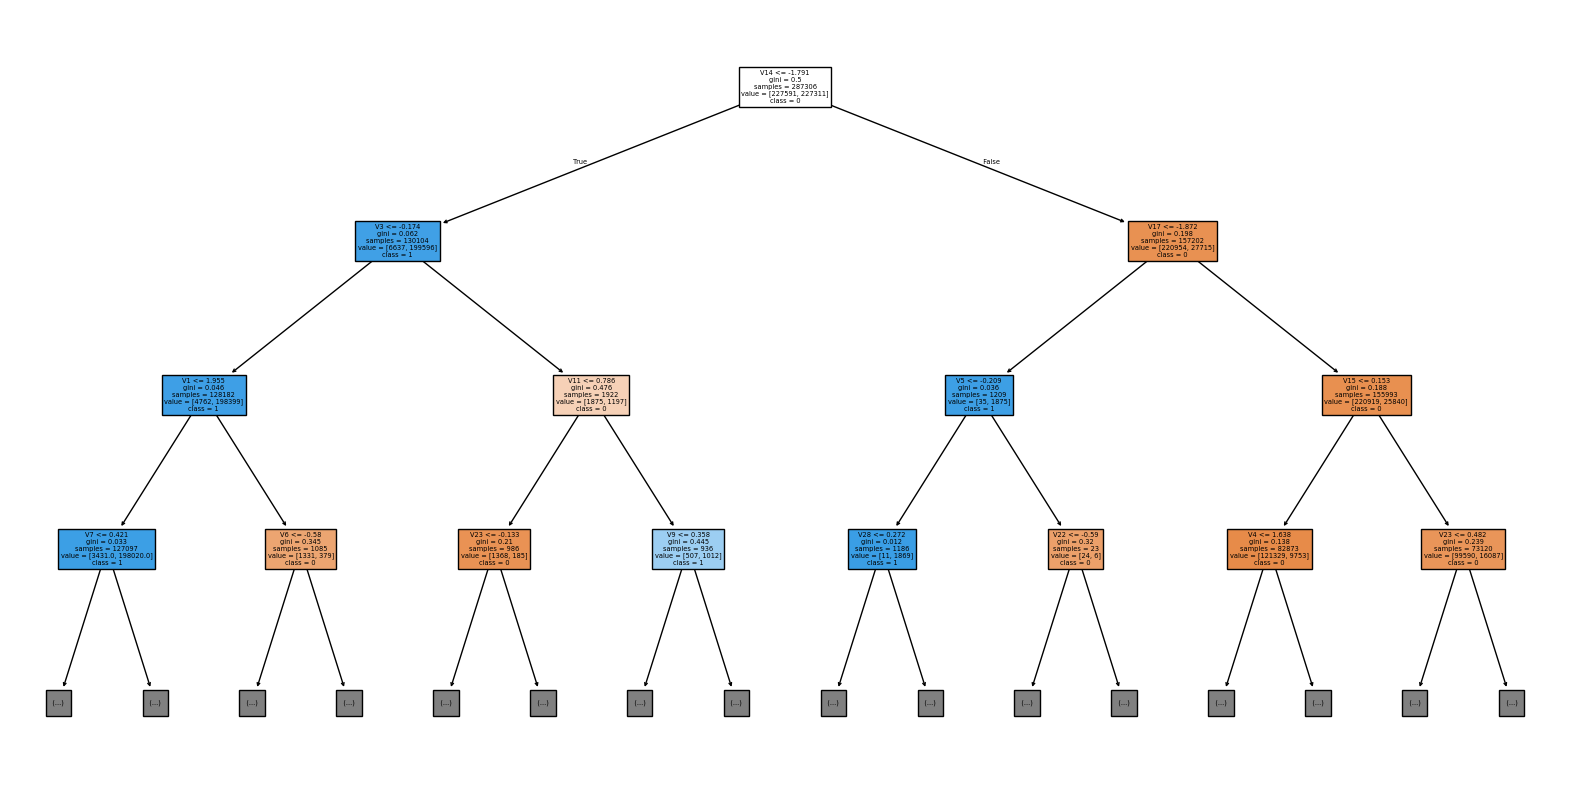

In [17]:
plt.figure(figsize=(20,10))
plot_tree(single_tree,filled=True,feature_names=X_train_smote.columns,class_names=['0','1'],max_depth=3)
plt.show()

In [18]:
Y_pred = rf.predict(X_test)

In [19]:
Y_test

,Class
263020,0
11378,0
147283,0
219439,0
36939,0
...,...
54199,0
184616,0
274532,0
269819,0


In [20]:
Y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [21]:
accuracy_rf = accuracy_score(Y_test,Y_pred)
precision_rf = precision_score(Y_test,Y_pred)
recall_rf = recall_score(Y_test,Y_pred)
f1_rf = f1_score(Y_test,Y_pred)

print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1:{f1_rf}")

Accuracy: 0.999403110845827
Precision: 0.8333333333333334
Recall: 0.8163265306122449
F1:0.8247422680412371


In [22]:
print(" Logistic Regression ")
print("-"*30)
print(f"Accuracy: {accuracy_lr}")
print(f"Precision: {precision_lr}")
print(f"Recall: {recall_lr}")
print(f"F1:{f1_lr}")
print()
print("="*30)
print()
print(" Random Forest ")
print("-"*30)
print(f"Accuracy: {accuracy_rf}")
print(f"Precision: {precision_rf}")
print(f"Recall: {recall_rf}")
print(f"F1:{f1_rf}")

 Logistic Regression 
------------------------------
Accuracy: 0.9729995435553527
Precision: 0.05555555555555555
Recall: 0.9183673469387755
F1:0.10477299185098952


 Random Forest 
------------------------------
Accuracy: 0.999403110845827
Precision: 0.8333333333333334
Recall: 0.8163265306122449
F1:0.8247422680412371


##From the above Evaluation we can say that **Random Forest** is far more stable and reliable for fraud detection.